# Exercises 1

This exercises will generate the estimated data of temperature using 3Dvar method. It use two functions, that I created to help me solve the problem. The first function $\textbf{var}$ will return the estimate of data given all the matrices $x,y,H,B,R$ but making the matrices $H,B,R$ will be generated by function we called $\textbf{B_Matrix}$.

In [1]:
def var(x,y,H,B,R):
    
    k=(B@(H.T))@(np.linalg.inv(R+H@B@(H.T)))
    xbar=x+k@(y-H@x)
    return xbar
def B_Matrix(sigmasquare,cvb,n):
    import numpy as np
    return sigmasquare*np.eye(n,k=0)+cvb*(np.eye(n,k=1)+np.eye(n,k=-1))

import numpy as np
n=5
i=0.5
sigmasquare=6

xb=np.array([13,12,15,19,17]).T
y=np.array([13.2,14.9,16.9,18.0,19.8]).T
B=B_Matrix(i,0.125,n)
R=B_Matrix(0.24,0,n)
H=np.eye(n)
xxx=var(xb,y,H,B,R)
print("x=",xxx)

x= [13.27999435 14.04243346 16.32879959 18.59107296 18.79204849]


# Plots
After estimation of 3Dvar data using the above algorithm, and running the given example in the above cell, the below cell will plot $\textbf{estimated data}$, $\textbf{Observation data}$, and $\textbf{Background data}$ to see the relationship between the data.

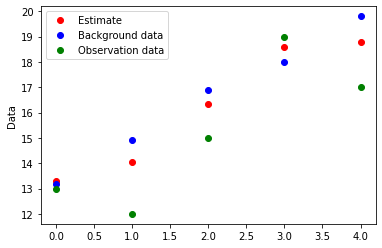

In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(xxx,"ro",label="Estimate")
plt.plot(y,"bo",label="Background data")
plt.plot(xb,"go",label="Observation data")
plt.legend()
plt.xlabel("")
plt.ylabel("Data")
#plt.grid()
plt.show()


# Plots for diffrent values of sigma

After seeing that for the estimate is very sensitive to $\textbf{$\sigma$}$ mentioned in the figure. It is observed that for some values fall from zero, the estimates values and observation data are somehow close, as you can see in the below plots, for different values.

## How the below cell works

It is connected to above calls, to run it, cells above must have been run before, different values of $\sigma$ were entered into a list and the function take that value and and find the values of estimate data and plot the results.

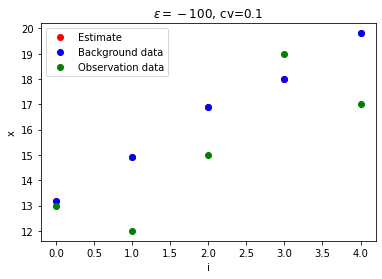

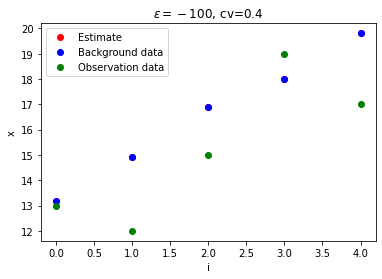

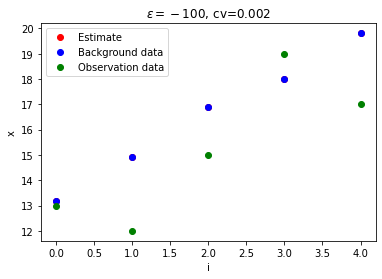

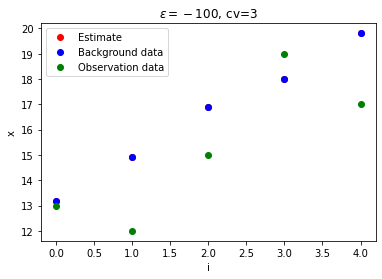

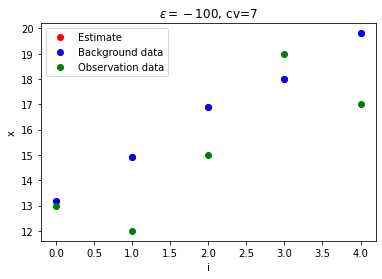

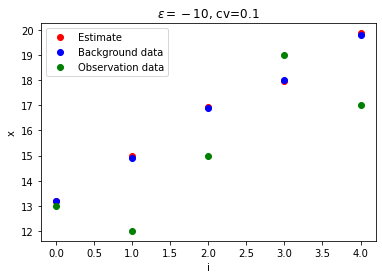

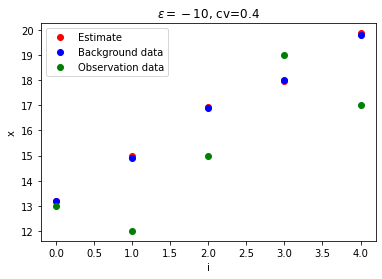

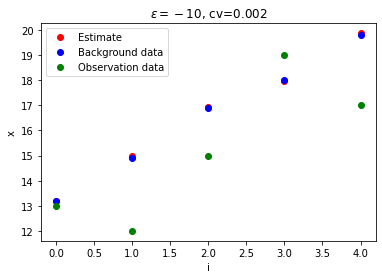

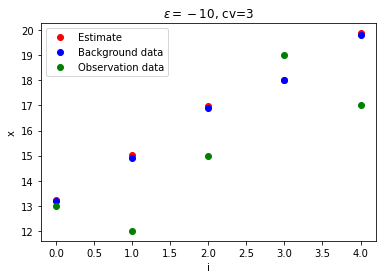

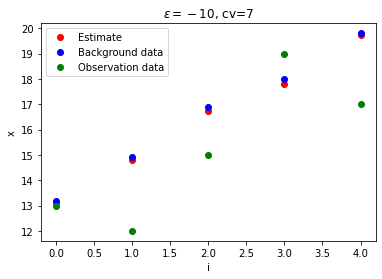

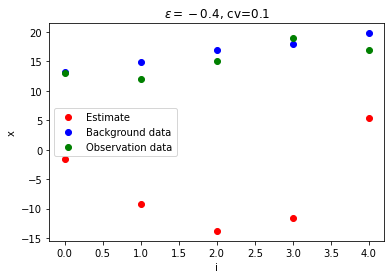

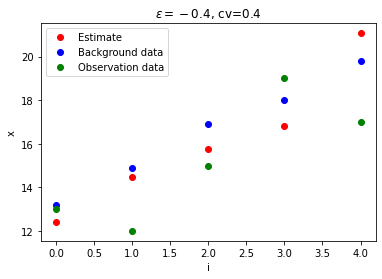

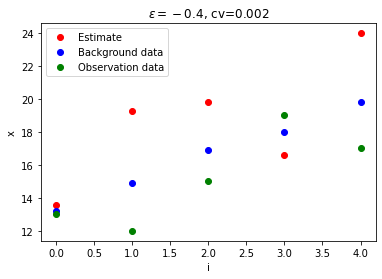

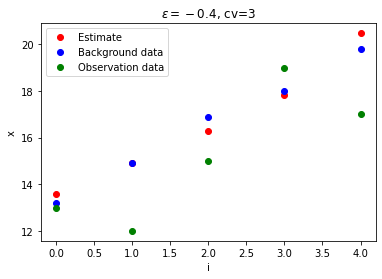

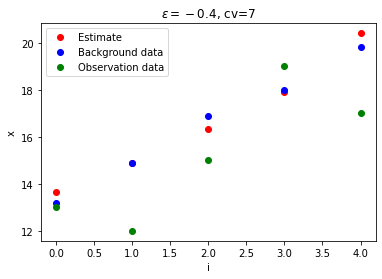

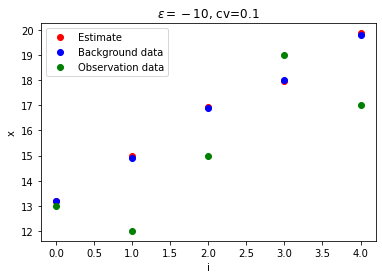

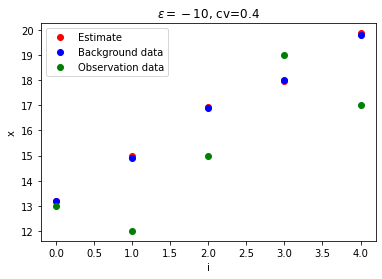

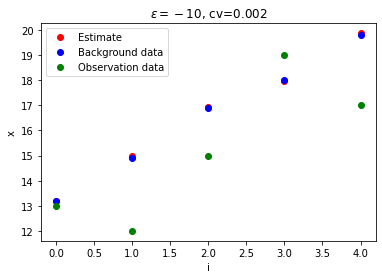

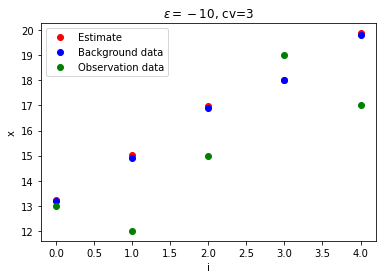

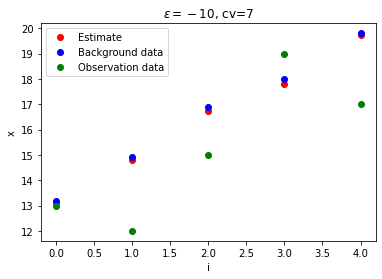

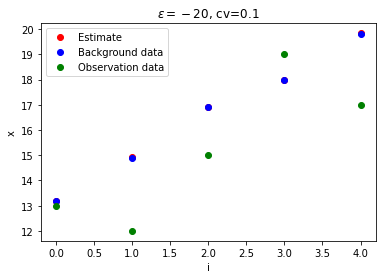

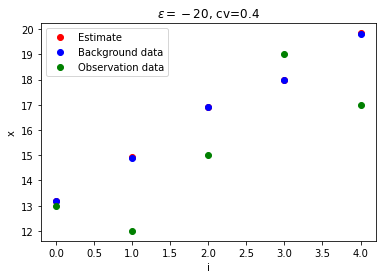

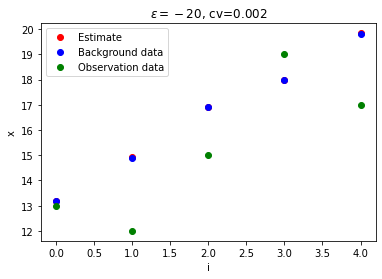

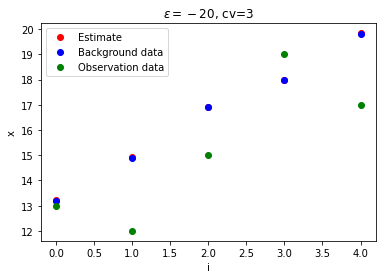

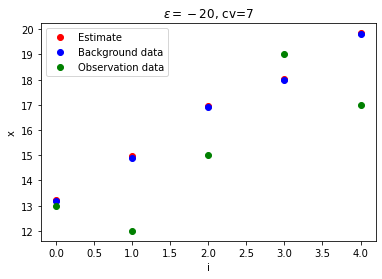

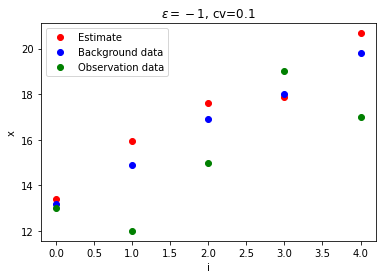

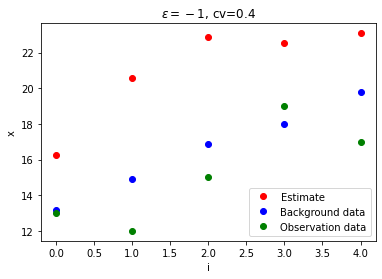

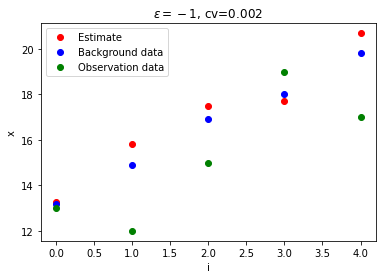

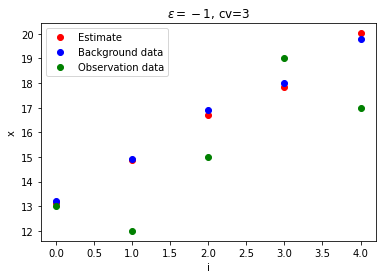

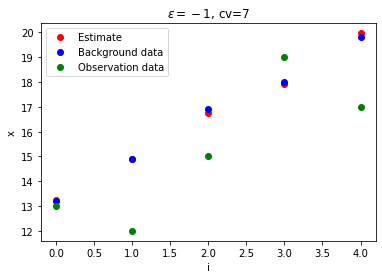

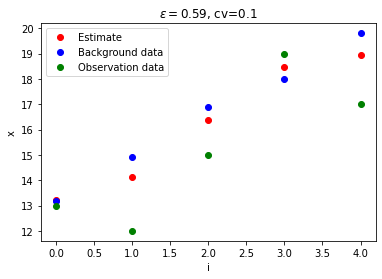

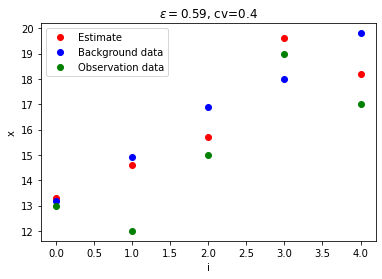

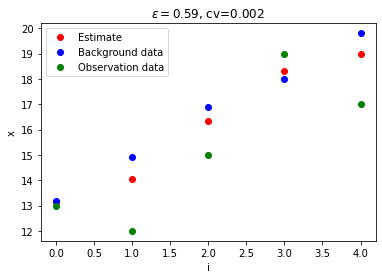

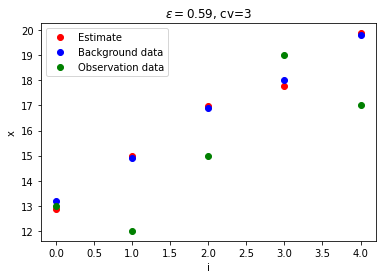

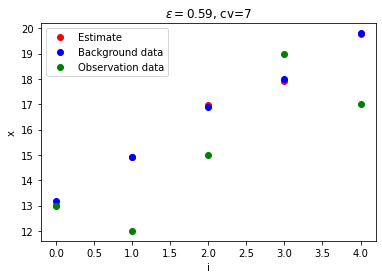

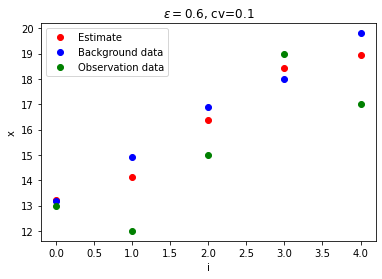

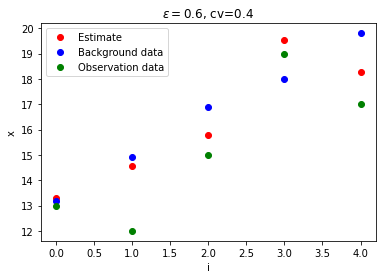

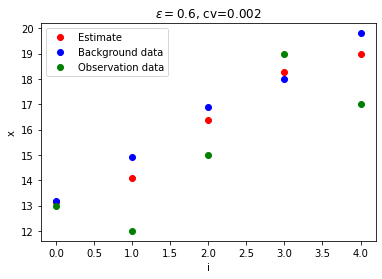

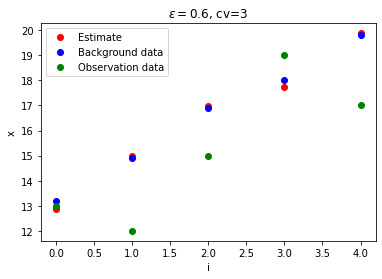

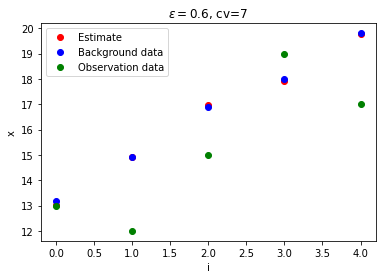

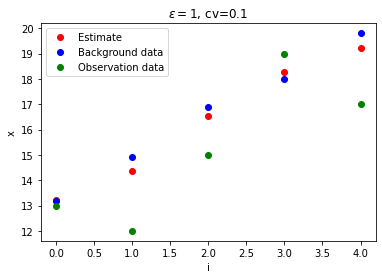

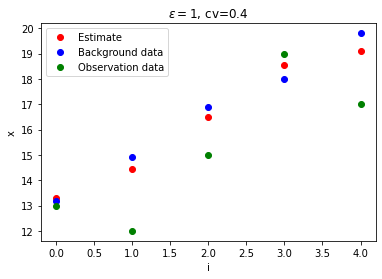

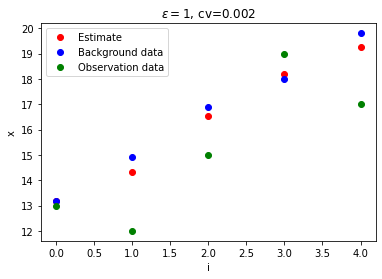

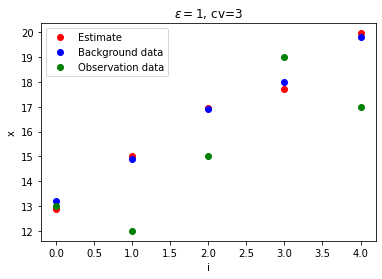

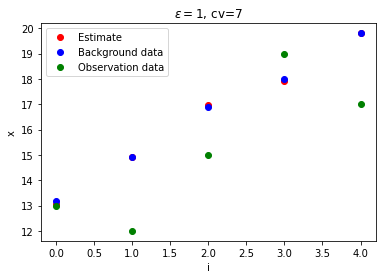

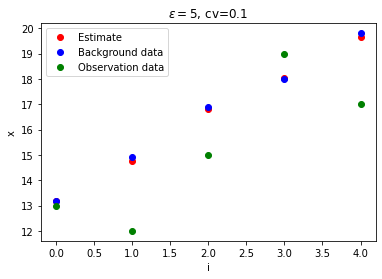

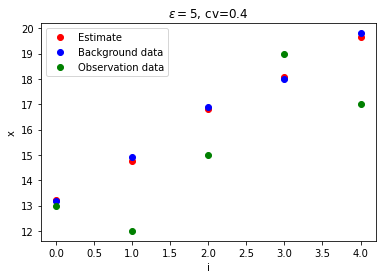

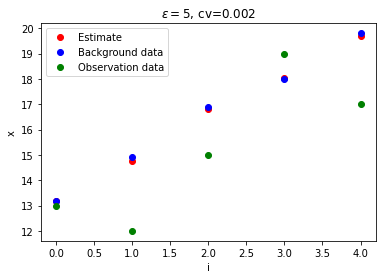

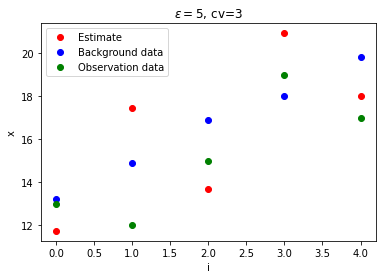

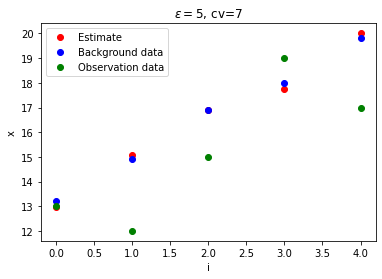

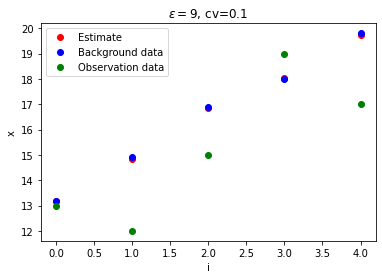

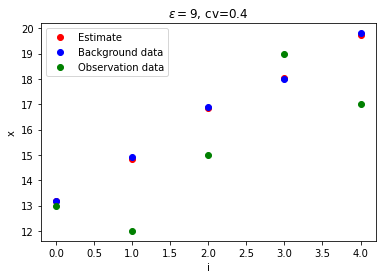

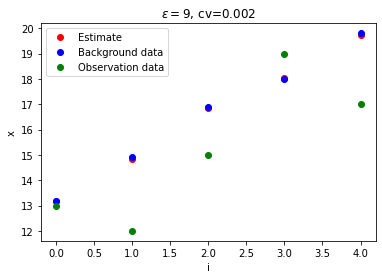

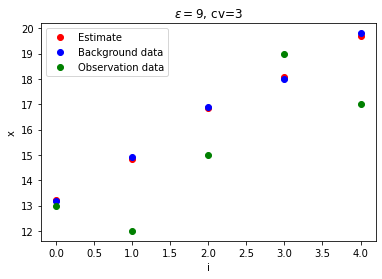

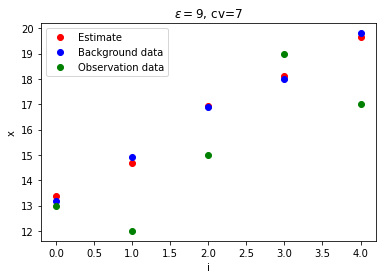

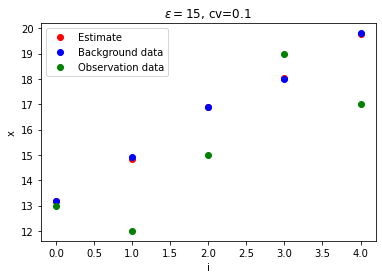

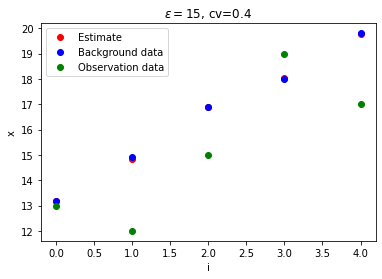

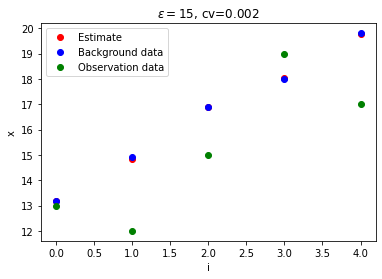

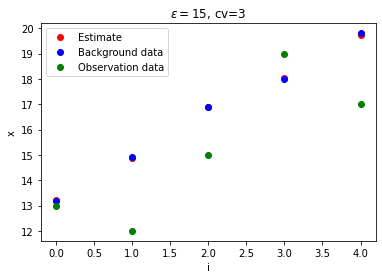

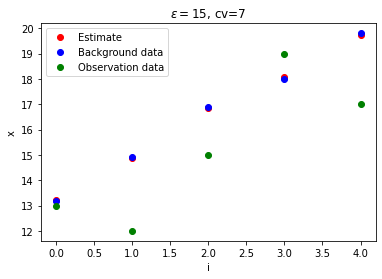

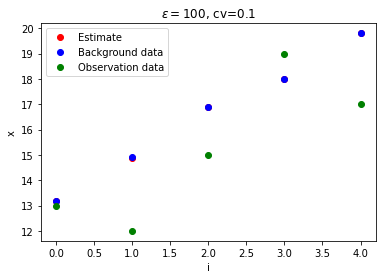

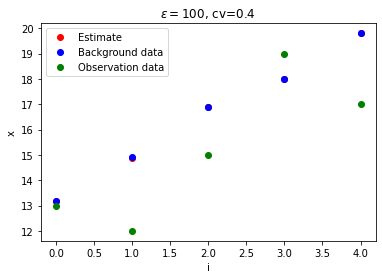

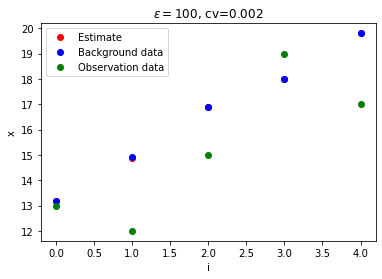

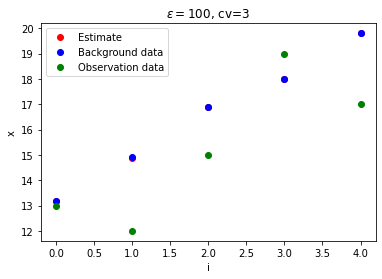

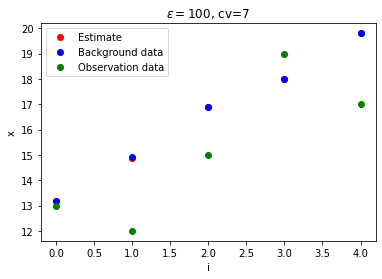

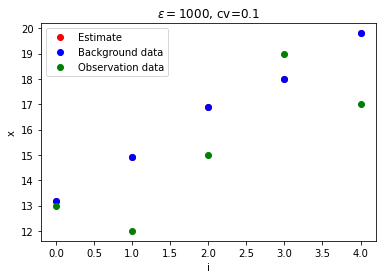

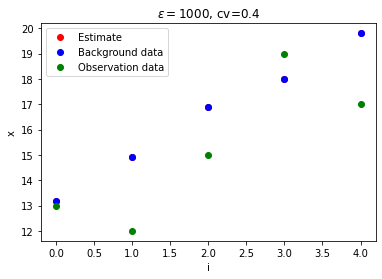

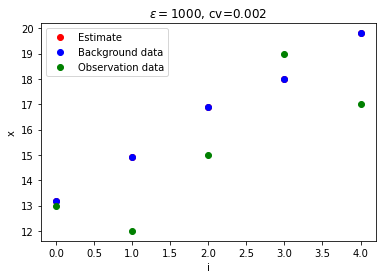

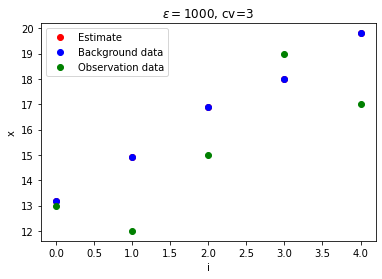

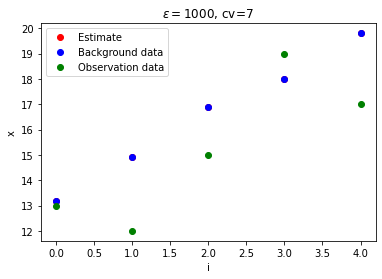

In [3]:
def ploter(NS, CVS):
    import numpy as np
    import matplotlib.pyplot as plt
    b=np.array([13,12,15,19,17]).T
    y=np.array([13.2,14.9,16.9,18.0,19.8]).T
    xb=np.array([13,12,15,19,17]).T
    R=B_Matrix(0.24,0,n)
    H=np.eye(n)
    
    
    for i in NS:
        for j in CVS:
            B=B_Matrix(i,j,n)
            x=var(xb,y,H,B,R)
            #plt.subplot(1,3,i)
            figg=plt.plot(x,"ro",label="Estimate")
            plt.plot(y,"bo",label="Background data")
            plt.plot(xb,"go",label="Observation data")
            plt.legend()
            plt.title(f"$\epsilon={i}$, cv={j}")
            plt.xlabel("i")
            plt.ylabel("x")
            plt.show()
    return figg
CVS=[0.1, 0.4, 0.002, 3, 7]
NS=[-100 ,-10, -0.4, -10, -20, -1,0.59 , 0.6, 1,5, 9, 15, 100, 1000]
nn=ploter(NS, CVS)    
        

# Exercises 3
### This function will generate x and y for me.

Considering a physical process with scalar state variables $x_i$ generated according to $x_i = 1.2x_i−1(1−
x_i−1)$, $i = 1, . . . , 40$ and data $y_i = x_i + \epsilon_ i$ where $\epsilon_i$ are independent random variables that
follow a Normal distribution with mean $0$ and standard deviation $\sigma$. The following Python code
to answer the following questions.

#### 3.0  Generation of x and y
Starting with $x_0 = 0.2$, the below function generate   the state variables $x_i$ for  $i = 1, . . . , 40, $ This function also generates  $y_i = x_i + \epsilon_i$, $i = 1, . . . , 40$ with $\sigma = 0.002$ form values of $x_i$.

In [4]:
def xi(x0, sigma, alpha, n):
    import matplotlib.pyplot as plt
    import numpy as np
    x=np.zeros(n)
    np.random.seed(10)
    error=np.random.normal(0,sigma,n)
    x[0]=x0
    for i in range(1,n):
        x[i]=alpha*x[i-1]*(1-x[i-1])
    y=x+error
    return x,y

x3,y4=xi(x0=0.2,sigma=0.002, alpha=1.2, n=40)



# 3.1 Plot the state variables $x_i$ for $i = 1, . . . , 40$.

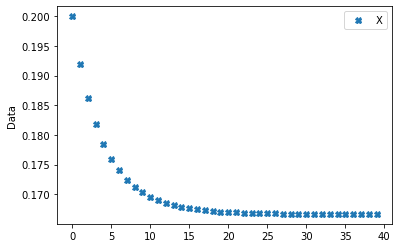

In [5]:
plt.plot(x3,"X",label="X")
plt.legend()
plt.ylabel("Data")
plt.show()
#x3

# 3.2 Plot of $y$ and $x$ data as points on the same graph as the state variables.

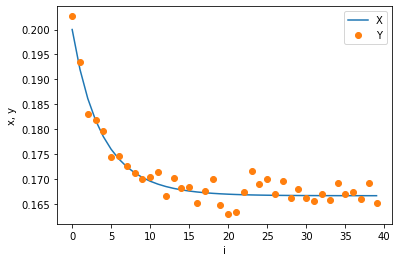

In [6]:
plt.plot(x3, label="X")
plt.plot(y4,"o", label="Y")
plt.ylabel("x, y")
plt.xlabel("i")
plt.legend()
plt.show()
#y4

# 3. c. Data generation

In [7]:
def costfunction(x0):
    import numpy as np
    x=np.zeros(40);x[0] = x0
    for j in range(1, 40):
        x[j]=1.2*x[j-1]*(1-x[j-1])
    Jj = sum((y4-x)**2)
    return Jj
x00=np.linspace(0,0.7,200)
y00=[costfunction(x00) for x00 in x00]
#plt.plot(x00,y00,color='g')
#plt.show()

# Plotting of cost function and showing the minimum point.

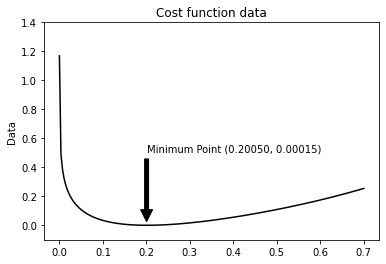

In [8]:
fig = plt.figure(111)
ax = fig.add_subplot()


line, = plt.plot(x00, y00, color="black")

ymin = min(y00)
xposistion = y00.index(ymin)
xat_ymin = x00[xposistion]
text= "Minimum Point ({:.5f}, {:.5f})".format(xat_ymin, ymin)

ax.annotate(text, xy=(xat_ymin, ymin), xytext=(xat_ymin, ymin+0.51),
            arrowprops=dict(facecolor='black', shrink=0.05),)

ax.set_ylim(-0.1,1.4)
plt.ylabel("Data")
plt.title("Cost function data")
plt.show()

# 3. d Updated estimate with original estimate

In [9]:
x,yi=xi(x0=xat_ymin, sigma=0.002, alpha=1.2, n=40)

plt.plot(xx,label="updated",color='Lime')


x,y2=xi(x0=0.2, sigma=0.002, alpha=1.2, n=40)
plt.plot(x,label=" original state estimates",color='red')
plt.legend()
plt.ylabel("Data")
plt.show()

NameError: name 'xx' is not defined